## EDA1
* compute **cardinality** of features
* identify **categorical** features
* identify **missing** values

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
URL = "https://objectstorage.us-ashburn-1.oraclecloud.com/n/bigdatadatasciencelarge/b/hosted-ds-datasets/o/synthetic%2Forcl_attrition.csv"

data_orig = pd.read_csv(URL)

data_orig.head()

,Age,Attrition,TravelForWork,SalaryLevel,JobFunction,CommuteLength,EducationalLevel,EducationField,Directs,EmployeeNumber,...,WeeklyWorkedHours,StockOptionLevel,YearsinIndustry,TrainingTimesLastYear,WorkLifeBalance,YearsOnJob,YearsAtCurrentLevel,YearsSinceLastPromotion,YearsWithCurrManager,name
0,42,Yes,infrequent,5054,Product Management,2,L2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Tracy Moore
1,50,No,often,1278,Software Developer,9,L1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Andrew Hoover
2,38,Yes,infrequent,6296,Software Developer,3,L2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Julie Bell
3,34,No,often,6384,Software Developer,4,L4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Thomas Adams
4,28,No,infrequent,2710,Software Developer,3,L1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Johnathan Burnett


## We can use functionality of Pandas to get easily information on the Dataset

### How many samples

In [22]:
print('We have', data_orig.shape[0], 'samples.')

We have 1470 samples.


### Data types

In [24]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   TravelForWork             1470 non-null   object
 3   SalaryLevel               1470 non-null   int64 
 4   JobFunction               1470 non-null   object
 5   CommuteLength             1470 non-null   int64 
 6   EducationalLevel          1470 non-null   object
 7   EducationField            1470 non-null   object
 8   Directs                   1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Missing values

In [3]:
# check if there are missing values
data_orig.isnull().sum()

Age                         0
Attrition                   0
TravelForWork               0
SalaryLevel                 0
JobFunction                 0
CommuteLength               0
EducationalLevel            0
EducationField              0
Directs                     0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
WeeklyWorkedHours           0
StockOptionLevel            0
YearsinIndustry             0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsOnJob                  0
YearsAtCurrentLevel         0
YearsSince

In [4]:
### the computed value is the total number of missing values for each column. As we can see there are no missing values

### Feature cardinality

In [11]:
# compute the cardinality for each column
cols = sorted(data_orig.columns)

print('Cardinality for each column')
print()
for col in cols:
    print('# of distinct values in', col, ':', data_orig[col].nunique())

Cardinality for each column

# of distinct values in Age : 43
# of distinct values in Attrition : 2
# of distinct values in CommuteLength : 29
# of distinct values in Directs : 1
# of distinct values in EducationField : 6
# of distinct values in EducationalLevel : 5
# of distinct values in EmployeeNumber : 1470
# of distinct values in EnvironmentSatisfaction : 4
# of distinct values in Gender : 2
# of distinct values in HourlyRate : 71
# of distinct values in JobFunction : 3
# of distinct values in JobInvolvement : 4
# of distinct values in JobLevel : 5
# of distinct values in JobRole : 9
# of distinct values in JobSatisfaction : 4
# of distinct values in MaritalStatus : 3
# of distinct values in MonthlyIncome : 1349
# of distinct values in MonthlyRate : 1427
# of distinct values in NumCompaniesWorked : 10
# of distinct values in Over18 : 1
# of distinct values in OverTime : 2
# of distinct values in PercentSalaryHike : 15
# of distinct values in PerformanceRating : 2
# of distinct val

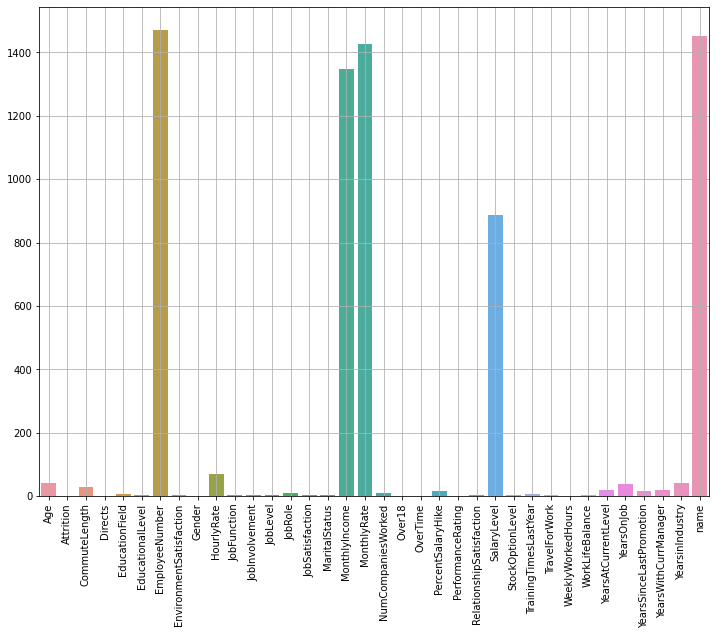

In [20]:
# let's do a plot

list_count =[data_orig[col].nunique() for col in cols]

# using Seaborn
plt.figure(figsize=(12,9))
sns.barplot(x=cols, y=list_count)
plt.xticks(rotation=90)
plt.grid(True)

In [23]:
# Cardinality must be compared to # of samples.
# column with numbers but low cardinality are good candidates for categorical

#### Low cardinality features

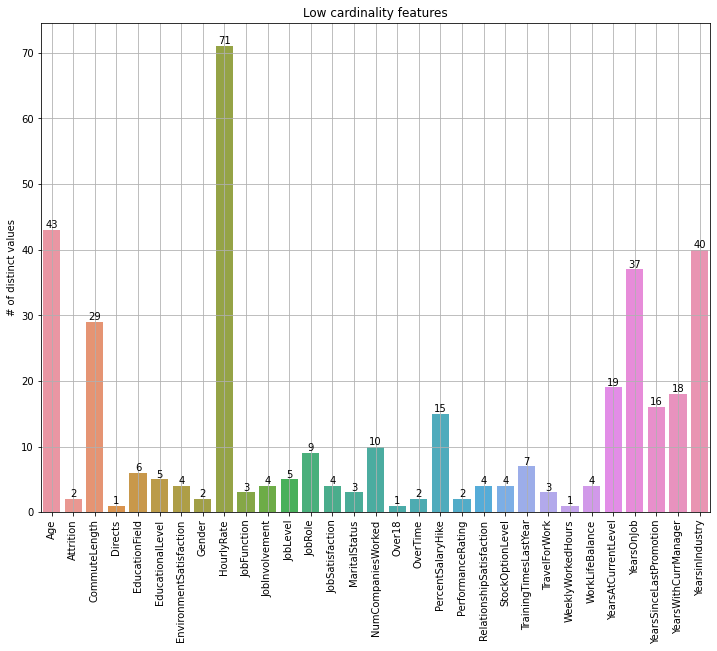

In [28]:
# give a better look at cols with low cardinality
THR = 100

cols2 = []
list_count2 = []

cols = sorted(data_orig.columns)

for col in cols:
    n_count = data_orig[col].nunique()
    if n_count < THR:
        cols2.append(col)
        list_count2.append(n_count)
        
# using Seaborn
plt.figure(figsize=(12,9))
plt.title('Low cardinality features')
# the plot
ax = sns.barplot(x=cols2, y=list_count2)
# to plot values on bar
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.ylabel('# of distinct values')
plt.grid(True)